# MULTI LINEAR ASSIGNMET 1 

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# loading data 
df=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
df


Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [3]:
## EDA ---
list(df)

['Id',
 'Model',
 'Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'Fuel_Type',
 'HP',
 'Met_Color',
 'Color',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Tow_Bar']

In [4]:
df.shape ## shape of the data set

(1436, 38)

In [6]:
df.info() ## checking null values & data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
## correlation
df.corr()

C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_25368\214103158.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Id     Price  Age_08_04  Mfg_Month  Mfg_Year  \
Id                1.000000 -0.738250   0.906132   0.043742 -0.919523   
Price            -0.738250  1.000000  -0.876590  -0.018138  0.885159   
Age_08_04         0.906132 -0.876590   1.000000  -0.123255 -0.983661   
Mfg_Month         0.043742 -0.018138  -0.123255   1.000000 -0.057416   
Mfg_Year         -0.919523  0.885159  -0.983661  -0.057416  1.000000   
KM                0.273298 -0.569960   0.505672  -0.020630 -0.504974   
HP               -0.109375  0.314990  -0.156622  -0.039312  0.164697   
Met_Color        -0.079713  0.108905  -0.108150   0.030266  0.103310   
Automatic         0.066265  0.033081   0.031717   0.009146 -0.033567   
cc               -0.117704  0.126389  -0.098084   0.037387  0.091892   
Doors            -0.130207  0.185326  -0.148359  -0.012069  0.151442   
Cylinders              NaN       NaN        NaN        NaN       NaN   
Gears            -0.043343  0.063104  -0.005364  -0.013063  0.007766   
Quarterly_Tax    -0.240821  0.219197  -0.198431   0.031373  0.193934   
Weight           -0.414500  0.581198  -0.470253  -0.002167  0.473478   
Mfr_Guarantee    -0.162006  0.197802  -0.164658  -0.005771  0.166697   
BOVAG_Guarantee  -0.015065  0.028133   0.006865  -0.003863 -0.006206   
Guarantee_Period -0.086256  0.146627  -0.152563   0.029010  0.148218   
ABS              -0.461437  0.306138  -0.412887   0.072532  0.402215   
Airbag_1         -0.123465  0.093588  -0.105406   0.003756  0.105359   
Airbag_2         -0.358316  0.248974  -0.329017   0.076749  0.317075   
Airco            -0.386207  0.429259  -0.403600   0.057088  0.395674   
Automatic_airco  -0.327468  0.588262  -0.426259  -0.049017  0.437718   
Boardcomputer    -0.695207  0.601292  -0.719449   0.017715  0.720567   
CD_Player        -0.464520  0.481374  -0.510895  -0.016736  0.517008   
Central_Lock     -0.238940  0.343458  -0.279631   0.010055  0.279490   
Powered_Windows  -0.236723  0.356518  -0.283856   0.025185  0.280996   
Power_Steering   -0.091587  0.064275  -0.069192  -0.055495  0.079676   
Radio            -0.010971 -0.041887   0.013791   0.031601 -0.019607   
Mistlamps        -0.139708  0.222083  -0.126895  -0.033504  0.133737   
Sport_Model      -0.028704  0.164121  -0.110988   0.052789  0.102080   
Backseat_Divider -0.136398  0.102569  -0.116751   0.023245  0.113237   
Metallic_Rim     -0.022232  0.108564  -0.040045   0.023506  0.036022   
Radio_cassette   -0.011611 -0.043179   0.012857   0.032576 -0.018844   
Tow_Bar           0.159171 -0.172369   0.188720  -0.042170 -0.182206   

                        KM        HP  Met_Color  Automatic        cc  ...  \
Id                0.273298 -0.109375  -0.079713   0.066265 -0.117704  ...   
Price            -0.569960  0.314990   0.108905   0.033081  0.126389  ...   
Age_08_04         0.505672 -0.156622  -0.108150   0.031717 -0.098084  ...   
Mfg_Month        -0.020630 -0.039312   0.030266   0.009146  0.037387  ...   
Mfg_Year         -0.504974  0.164697   0.103310  -0.033567  0.091892  ...   
KM                1.000000 -0.333538  -0.080503  -0.081854  0.102683  ...   
HP               -0.333538  1.000000   0.058712   0.013144  0.035856  ...   
Met_Color        -0.080503  0.058712   1.000000  -0.019335  0.031812  ...   
Automatic        -0.081854  0.013144  -0.019335   1.000000  0.066740  ...   
cc                0.102683  0.035856   0.031812   0.066740  1.000000  ...   
Doors            -0.036197  0.092424   0.085243  -0.027654  0.079903  ...   
Cylinders              NaN       NaN        NaN        NaN       NaN  ...   
Gears             0.015023  0.209477   0.018601  -0.098555  0.014629  ...   
Quarterly_Tax     0.278165 -0.298432   0.011326  -0.055371  0.306996  ...   
Weight           -0.028598  0.089614   0.057929   0.057249  0.335637  ...   
Mfr_Guarantee    -0.212851  0.140026   0.154850   0.026194 -0.057407  ...   
BOVAG_Guarantee   0.001438  0.022701   0.010783   0.023393 -0.081725  ...   
Guarantee_Period -0.138942  0.076163   0.0092

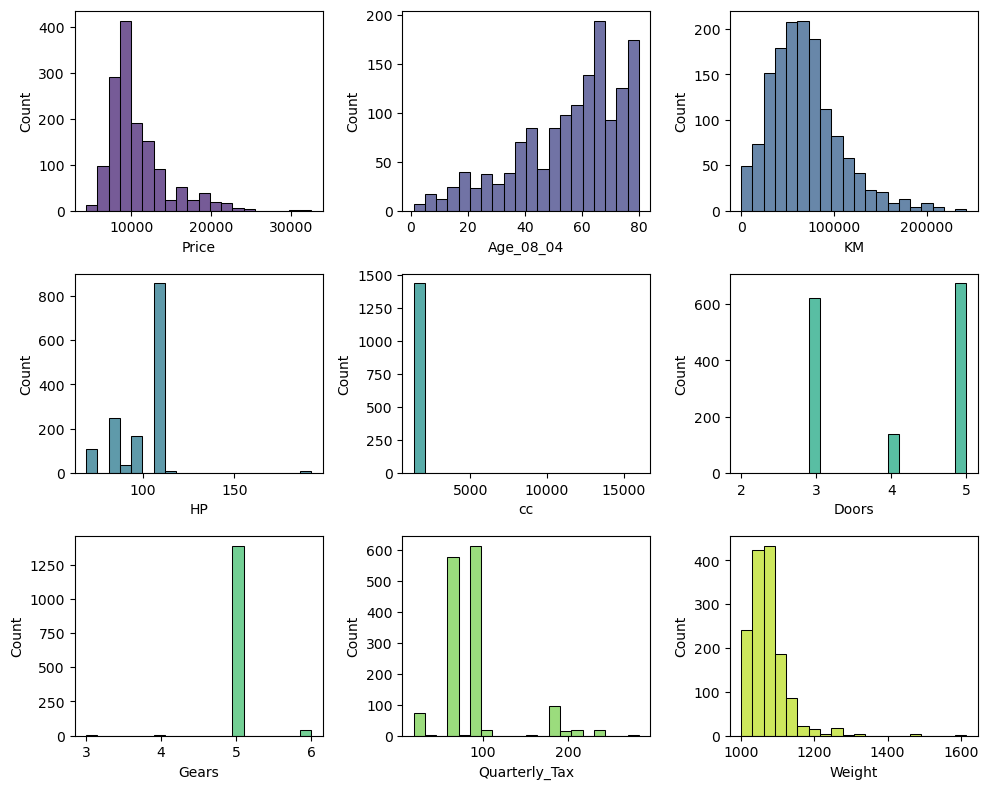

In [8]:
##--Histogram----###
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
h1 = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.histplot(data=df, x=variable, ax=axes[i // 3, i % 3], color=color, bins=20)
plt.tight_layout()
plt.show()


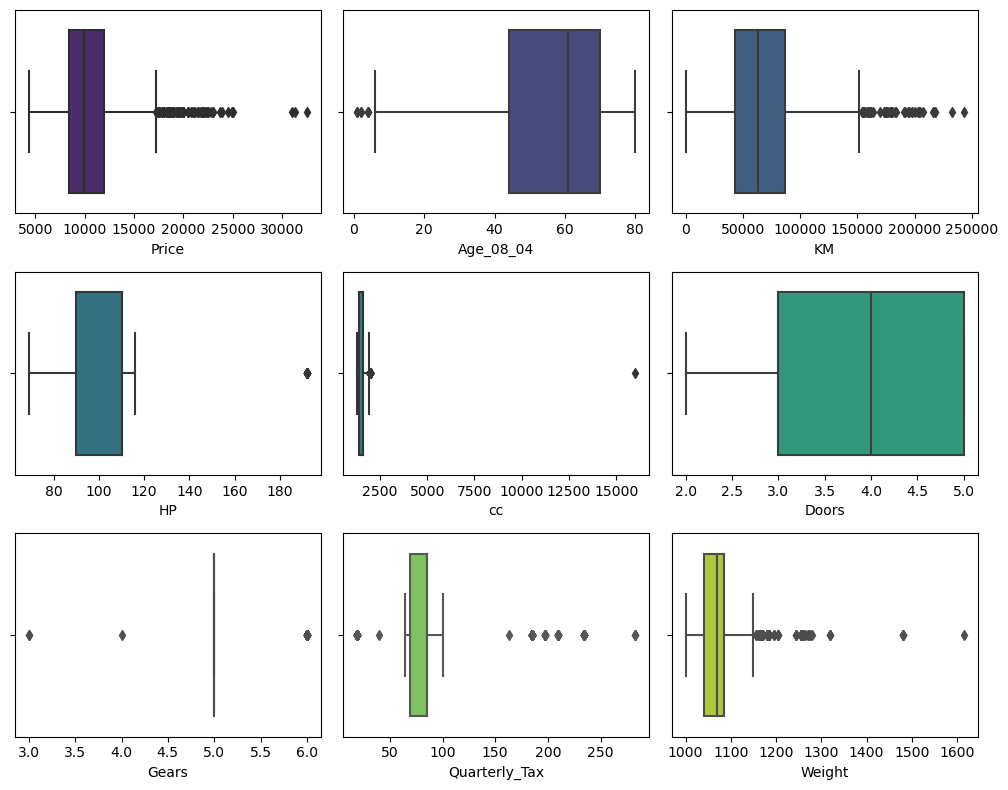

In [9]:
# box plot visuvalization
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
h1 = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.boxplot(data=df, x=variable, ax=axes[i // 3, i % 3],color=color)
plt.tight_layout()
plt.show()


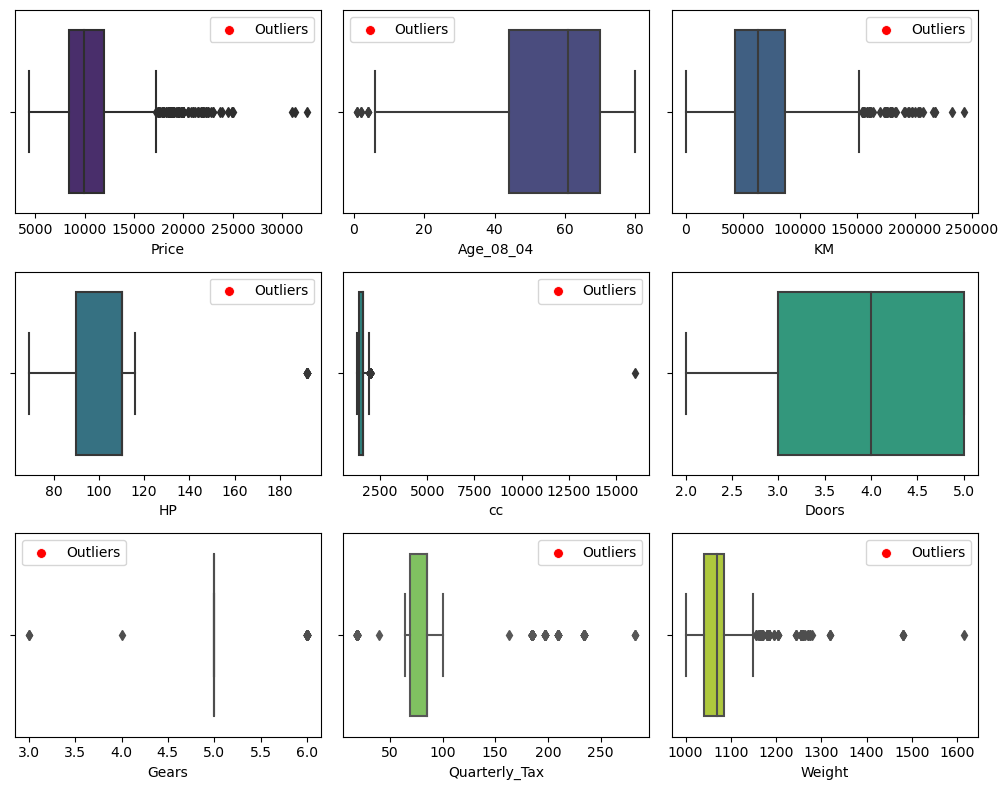

{'Price':       Id                                              Model  Price  Age_08_04  \
7      8      TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  18600         30   
8      9        TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors  21500         27   
10    11  TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors  20950         25   
11    12  TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...  19950         22   
12    13  TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...  19600         25   
..   ...                                                ...    ...        ...   
182  184         TOYOTA Corolla 1.4 16V 5DR TERRA 4/5-Doors  21125          2   
183  185     TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors  21500          2   
184  186   TOYOTA Corolla 1.4-16v VVT-i Linea Terra Comf...  17795          1   
185  187  TOYOTA Corolla 1.6-16v VVT-i Linea Terra Comfo...  18245          1   
523  526        TOYOTA Corolla 1.6 HB LINEA TERRA 2/3-Doors  18950         49   

     Mfg_Month  M

In [11]:
## outliers calculation
h1 = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']

outliers_dict = {}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
colors = sns.color_palette('viridis', n_colors=len(h1))

for i, variable in enumerate(h1):
    # Calculate quartiles
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    outliers_dict[variable] = outliers
 
    sns.boxplot(data=df, x=variable, ax=axes[i // 3, i % 3], color=colors[i])
    sns.scatterplot(data=outliers, x=variable, y=None, color='red', marker='o', s=50, ax=axes[i // 3, i % 3], label='Outliers')
plt.tight_layout()
plt.show()
print(outliers_dict)

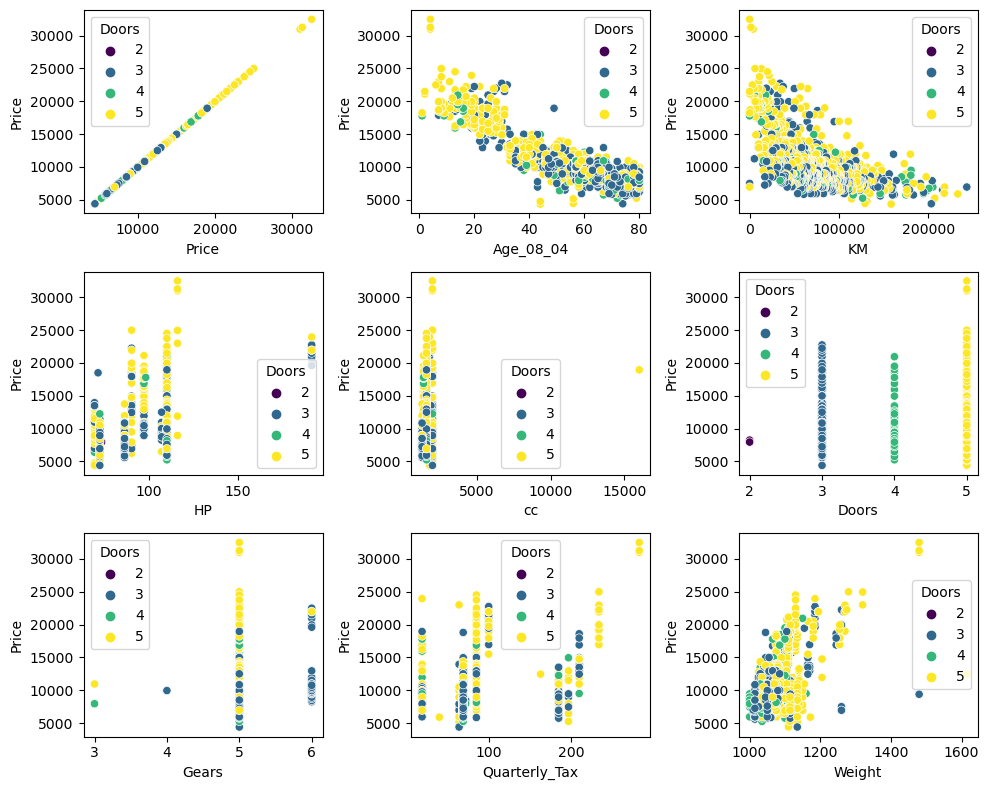

In [12]:
##--- Scatter plot---###
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
h1 = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']
for i, variable in enumerate(h1):
    sns.scatterplot(data=df, x=variable,y='Price',hue='Doors',ax=axes[i // 3,i%3],palette='viridis')
plt.tight_layout()
plt.show()


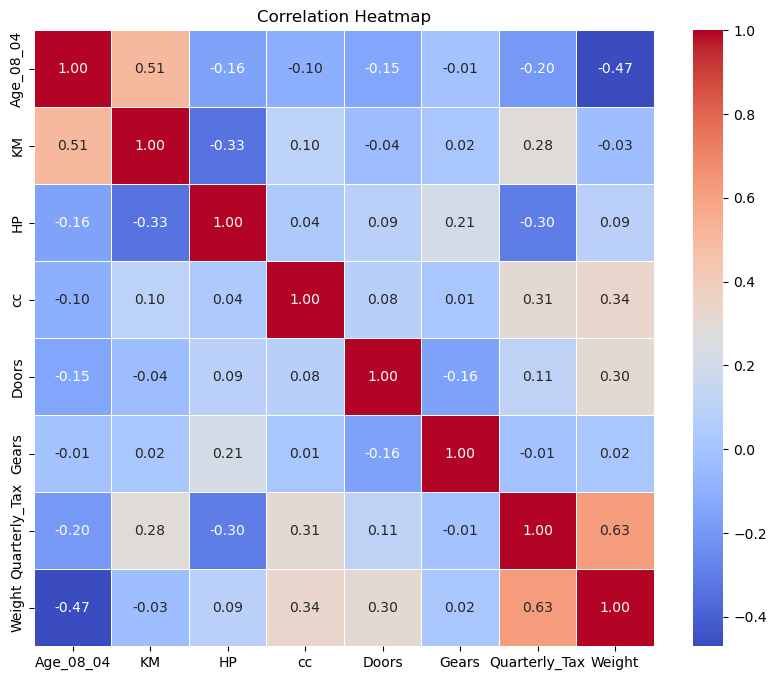

In [13]:
##-- Heatmap---##
heatmap_columns = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
correlation_matrix = df[heatmap_columns].corr()
columns = ["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
h1 = df[columns]
correlation_matrix = h1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


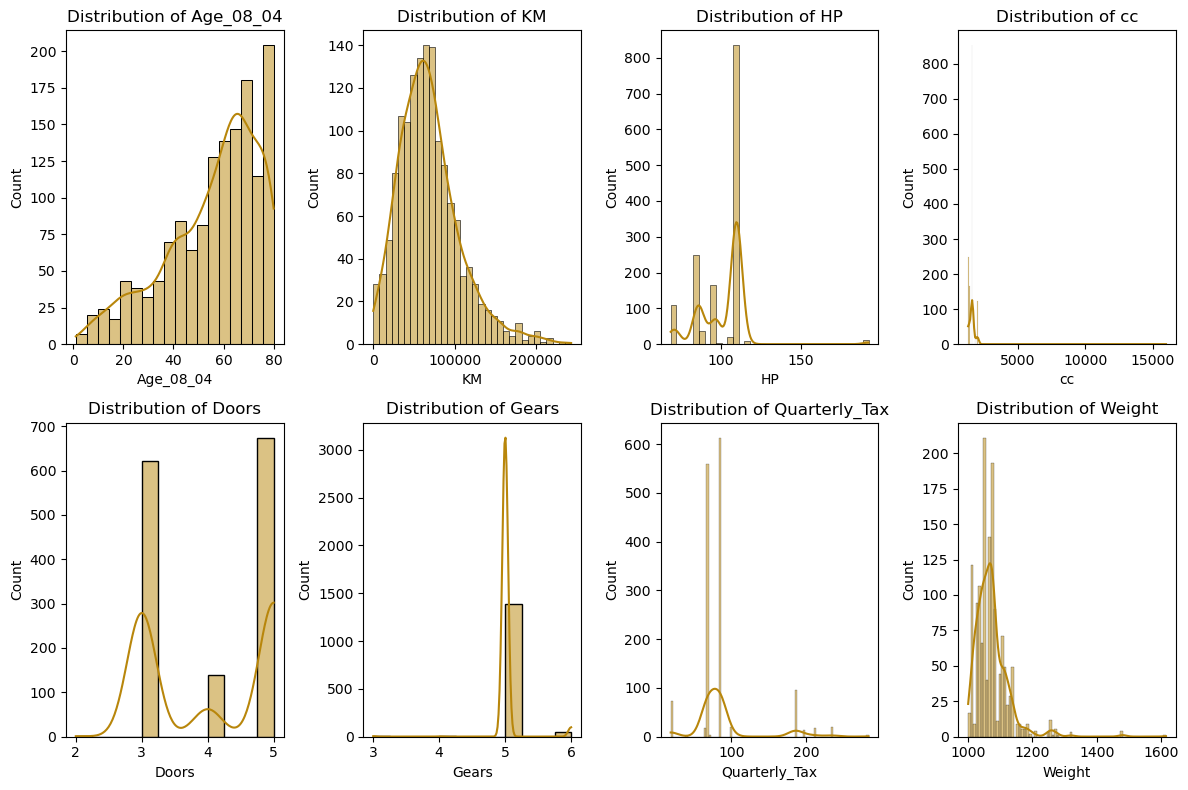

In [14]:
##-- Distribution plot--##
dsplot = ["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
axes = axes.flatten()
for i, column in enumerate(dsplot):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i], color='darkgoldenrod')
    axes[i].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


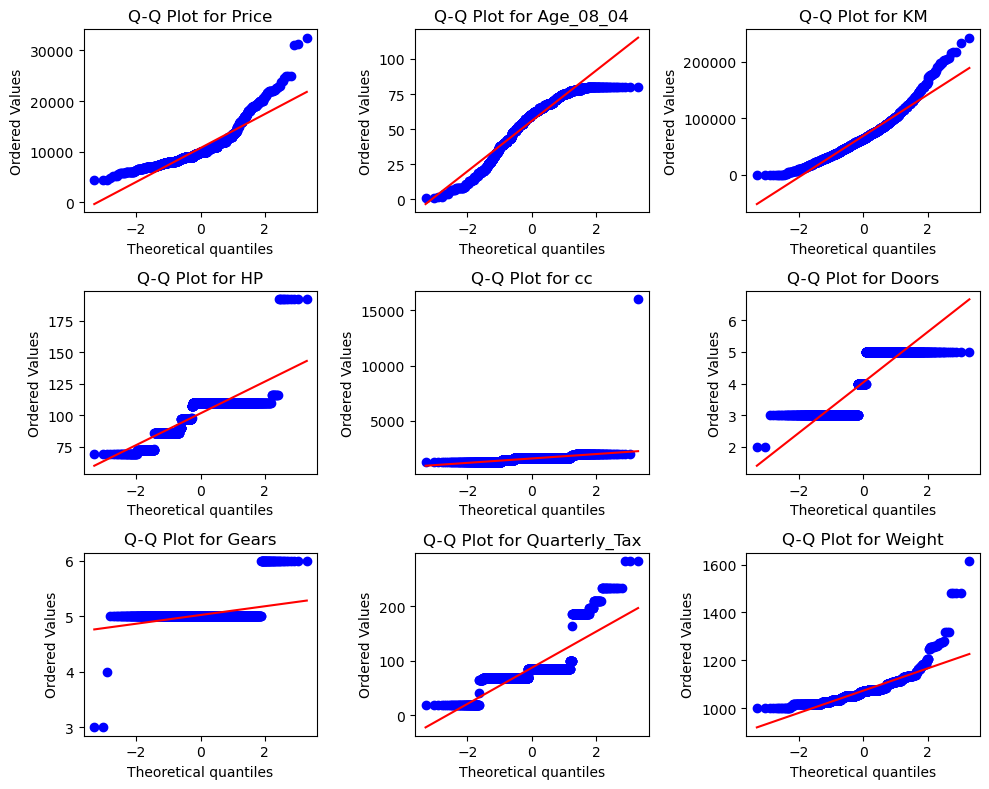

In [15]:
##--- Q-Q plot ---###
qqplot = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8))
axes = axes.flatten()
for i, column in enumerate(qqplot):
    stats.probplot(df[column], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot for {column}')
plt.tight_layout()
plt.show()


In [16]:
## -- pair plot-----#
sns.pairplot(df)
plt.show()


In [17]:
## X-&-Y-- variables---##
x=df[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
y=df[['Price']]


In [18]:
## Standardization
ss=StandardScaler()
x_new= ss.fit_transform(x)
y_new=ss.fit_transform(y)


In [19]:
## training and test ,data partion:
training_error=[]
test_error=[]
for i in range(1,101):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.3,random_state=i)
    
    LR = LinearRegression()
    LR.fit(x_new,y_new)
    
    y_pred_train= LR.predict(x_train)
    y_pred_test= LR.predict(x_test)
    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))


In [20]:
print('Average train error(Root mean squared) :',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Average test error(Root mean squared) :',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R^2 score:',r2_score(y_train,y_pred_train))


Average train error(Root mean squared) : 0.3656575461096134
Average test error(Root mean squared) : 0.37701578253126733
R^2 score: 0.8686963467355682


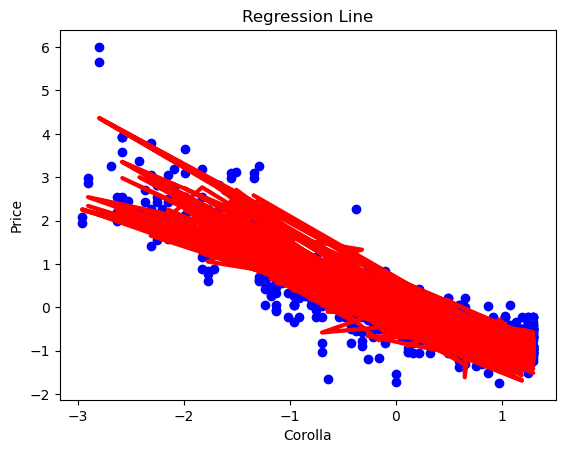

In [21]:
###---# Visualize the regression line
plt.scatter(x_train[:, 0], y_train, color='blue')  
plt.plot(x_train[:, 0], y_pred_train, color='red', linewidth=3)
plt.title('Regression Line')
plt.xlabel('Corolla')  
plt.ylabel('Price')
plt.show()


##  test and train errors
Average train error(Root mean squared) : 0.3656575461096134
Average test error(Root mean squared) : 0.37701578253126733
R^2 score: 0.8686963467355682